
# Pima Indians Diabetes - Exploratory Data Analysis (EDA)

**Tác giả**: Lê Khánh Hoàng  
**Hướng dẫn**: dựa theo yêu cầu của thầy

---


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Upload file 'pima-indians-diabetes.csv' trước khi chạy
df = pd.read_csv("pima-indians-diabetes.csv")

# Đặt lại tên cột cho dễ hiểu
df.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
              "BMI","DiabetesPedigreeFunction","Age","Outcome"]
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:

print("Kích thước dữ liệu:", df.shape)
print("\nThông tin dữ liệu:")
print(df.info())
print("\nThống kê mô tả:")
print(df.describe())


Kích thước dữ liệu: (767, 9)

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Thống kê mô tả:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   767.000000  767.000000     767.000000     767.000000  767.000000   
mean      3.84224

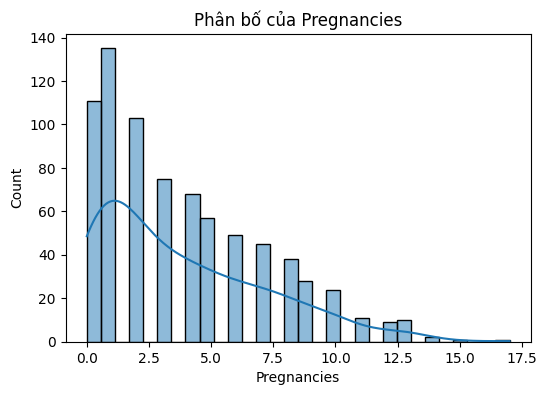

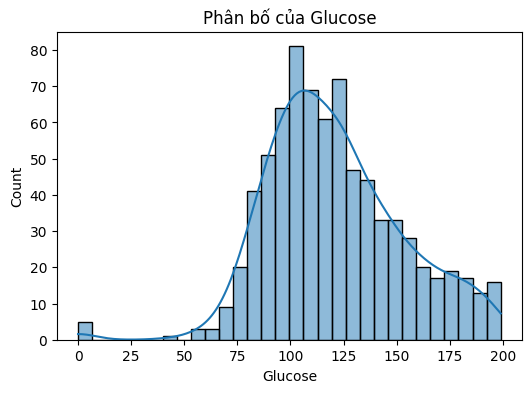

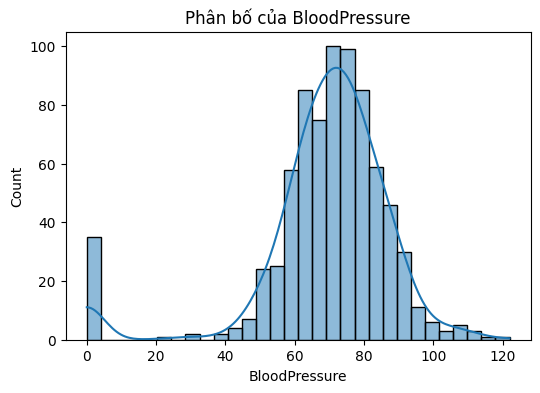

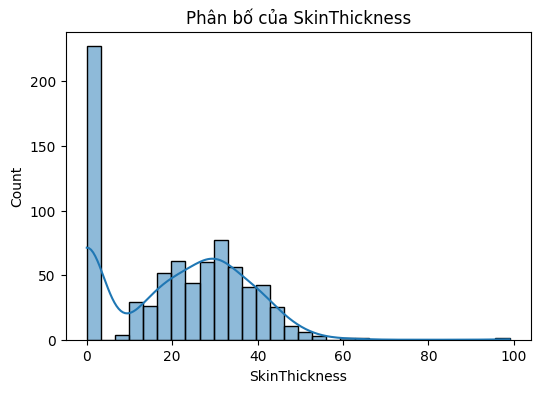

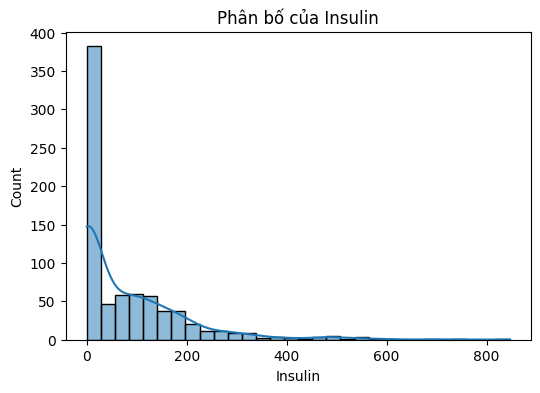

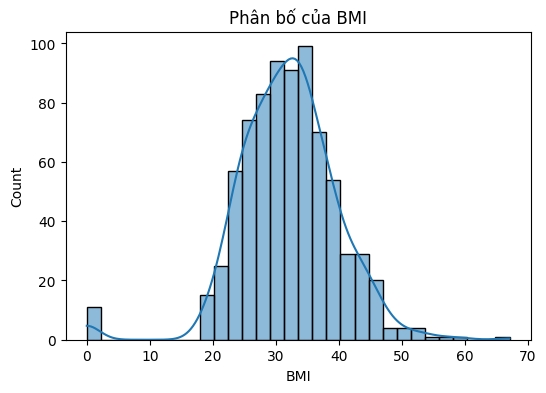

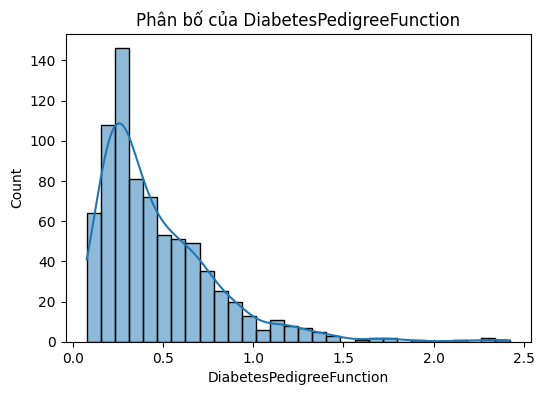

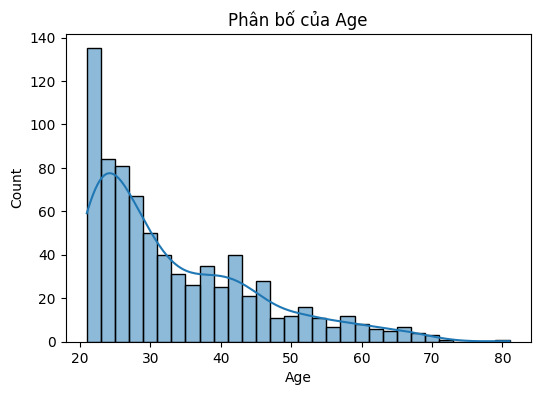

In [4]:

numeric_cols = df.columns[:-1]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Phân bố của {col}")
    plt.show()


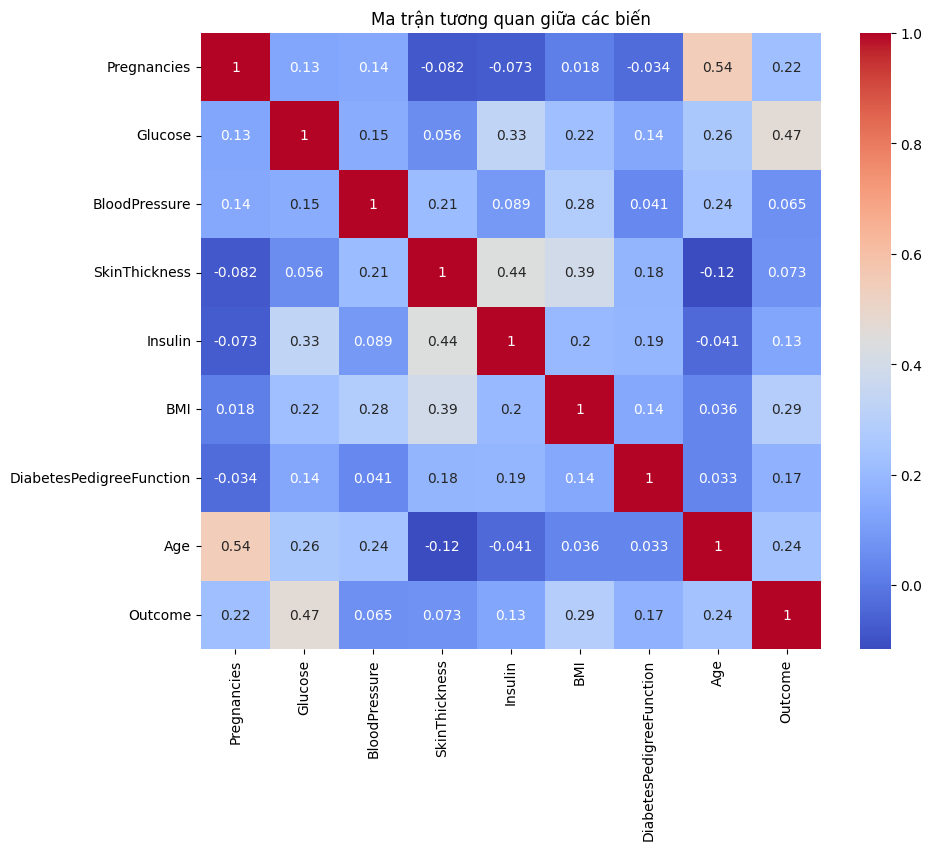

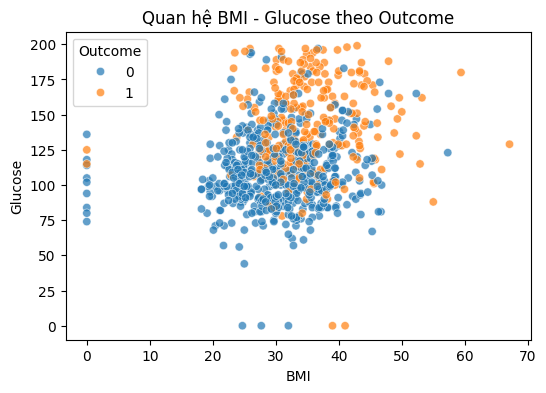

In [5]:

# Ma trận tương quan
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

# Scatter BMI vs Glucose theo Outcome
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="BMI", y="Glucose", hue="Outcome", alpha=0.7)
plt.title("Quan hệ BMI - Glucose theo Outcome")
plt.show()


In [6]:

missing_features = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in missing_features:
    num_missing = (df[col] == 0).sum()
    print(f"{col}: {num_missing} giá trị bằng 0 (coi như thiếu)")


Glucose: 5 giá trị bằng 0 (coi như thiếu)
BloodPressure: 35 giá trị bằng 0 (coi như thiếu)
SkinThickness: 227 giá trị bằng 0 (coi như thiếu)
Insulin: 373 giá trị bằng 0 (coi như thiếu)
BMI: 11 giá trị bằng 0 (coi như thiếu)


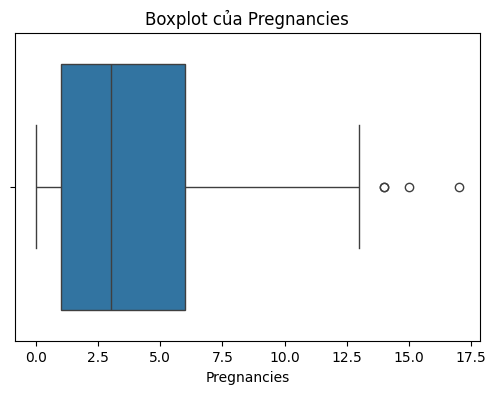

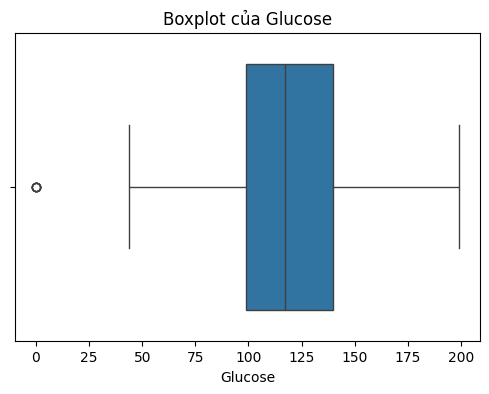

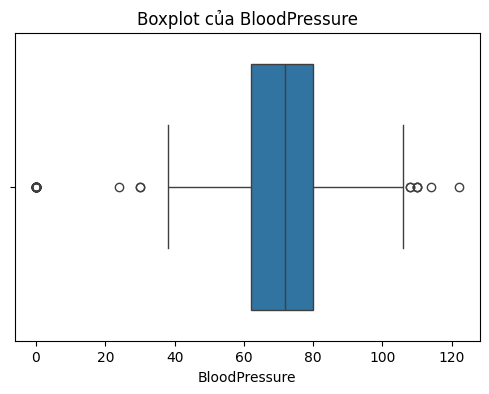

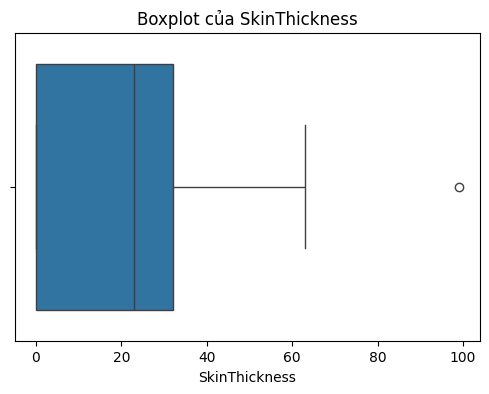

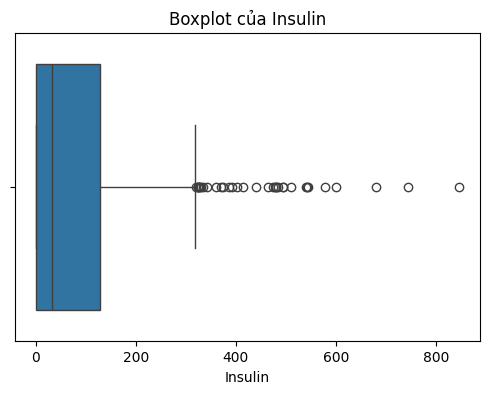

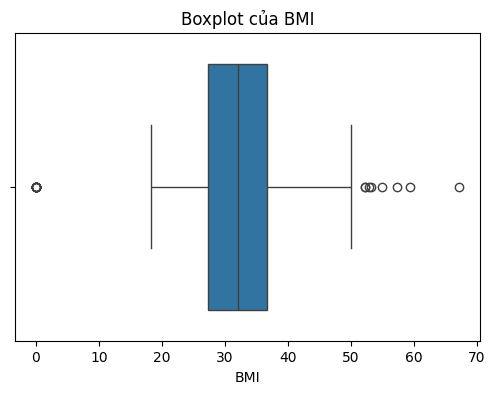

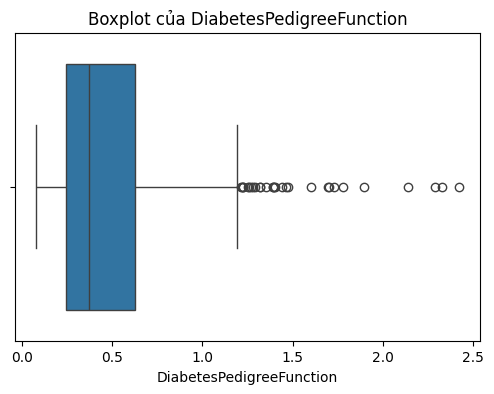

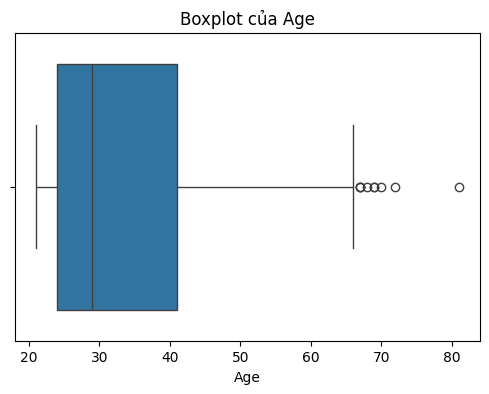

In [7]:

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot của {col}")
    plt.show()



## Kết luận sơ bộ

- Bộ dữ liệu có 768 mẫu, 9 thuộc tính.  
- Nhiều giá trị bằng 0 bất hợp lý ở Glucose, BloodPressure, SkinThickness, Insulin, BMI.  
- Glucose và BMI có tương quan mạnh với Outcome.  
- Cần xử lý dữ liệu thiếu & ngoại lệ trước khi xây mô hình dự đoán.  
